## Notebook to make Wordclouds by Country

In [1]:
from pandas import read_pickle

df = read_pickle('../data/cuentalo_json_con_pais_ciudad_limpios.pkl')
df.sample(5)

df.describe()

df = df[df['tweet_type'] == 'original']

Tweet 10000 out of 21369
Tweet 20000 out of 21369
There are 24900 words in this dictionary.
COUNTRY: Argentina


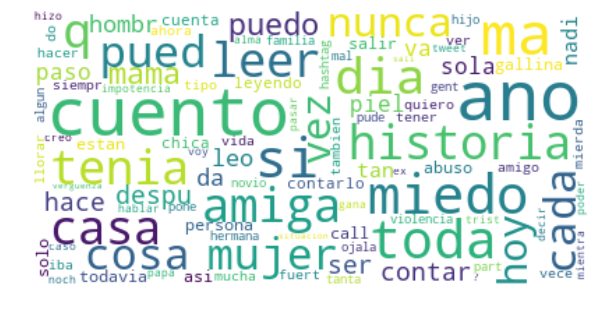

Tweet 10000 out of 21278
Tweet 20000 out of 21278
There are 34600 words in this dictionary.
COUNTRY: España


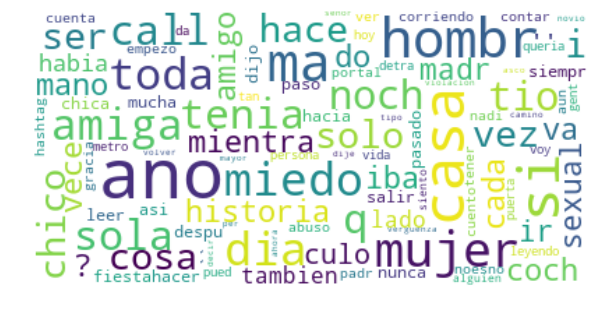

There are 11020 words in this dictionary.
COUNTRY: Colombia


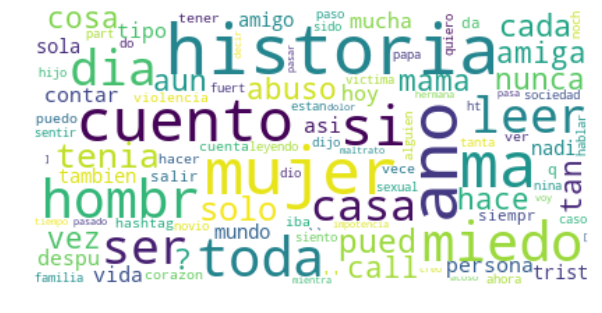

There are 9060 words in this dictionary.
COUNTRY: México


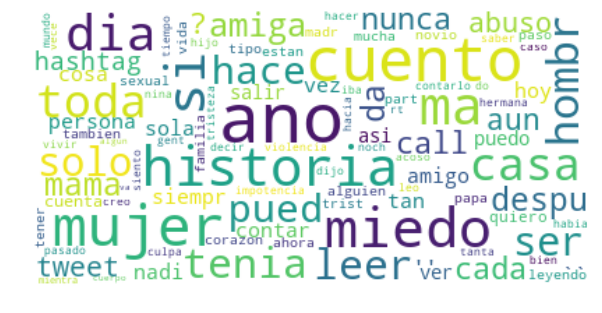

There are 8492 words in this dictionary.
COUNTRY: Chile


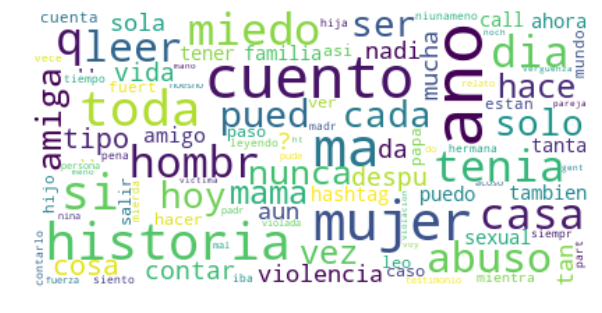

There are 6186 words in this dictionary.
COUNTRY: Estados Unidos


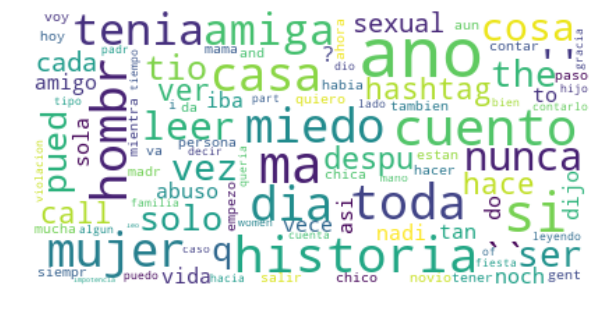

There are 5161 words in this dictionary.
COUNTRY: Perú


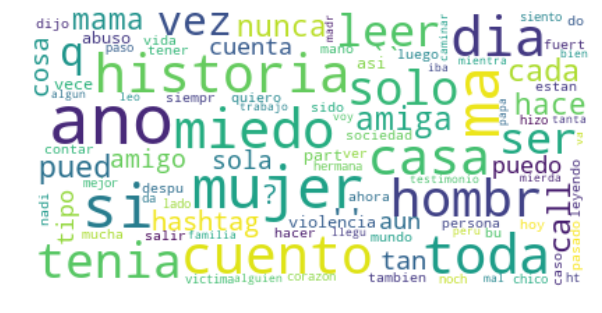

There are 3719 words in this dictionary.
COUNTRY: Uruguay


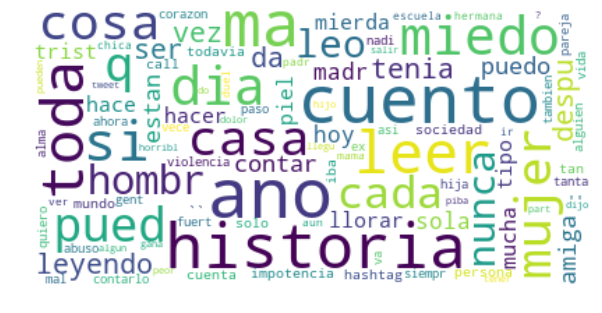

There are 4151 words in this dictionary.
COUNTRY: Venezuela


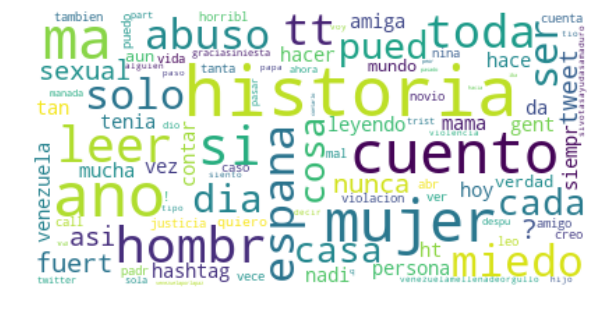

There are 3100 words in this dictionary.
COUNTRY: Costa Rica


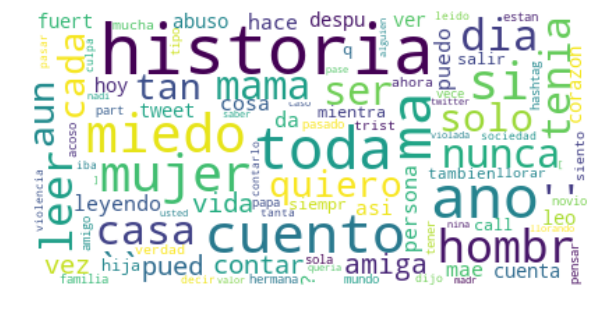

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import unidecode 
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

for country in list(df.pais_clean.value_counts()[:10].index.values):
    
    dff = df[df['pais_clean'] == country]
    dict_of_words = dict()
    ps = PorterStemmer()
    sw=set(stopwords.words('spanish'))
    count = 0

    for text in dff.full_text.values:
        text = str(text)
        for i in string.punctuation + '?' + "''" + '`' + '1234567890':
            text = text.replace(i, '')

        text = unidecode.unidecode(text)
        text = text.lower()    
        word_tk = word_tokenize(text)
        for word in word_tk:
            if word not in sw:

                if ps.stem(word) in dict_of_words.keys():
                    dict_of_words[ps.stem(word)] = dict_of_words[ps.stem(word)] + 1

                else:
                    dict_of_words[ps.stem(word)] = 1
        count += 1
        if count % 10000 == 0:
            print('Tweet {} out of {}'.format(count, dff.shape[0]))
            
    dict_of_words.pop('cuentalo')
    print('There are {} words in this dictionary.'.format(len(dict_of_words)))
    print('COUNTRY: {}'.format(country))
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(dict_of_words)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

There doesn't seem to be any difference between countries.